# **Analise de predição de dados de volumes financeiro da bolsa de Nova York.**

Dados obtidos de mostra estatísticas históricas de negociação da Bolsa de Nova York Intercâmbio. São mostradas três séries temporais diárias cobrindo o período de 3 de dezembro de 1962 a 31 de dezembro de 1986:

# Criando um método para receber os dados e criando um dataframe

> Os dados serão separados em dois grupos: 
grupo de treinamento (df_train) e de teste(df_test).

> O dataframe (**df**) possui uma coluna chamada "**train**", 
nessa coluna possui os dados **true** ou **false**, 
sendo true os dados para treinamento e false os dados para teste.

> Separamos os dados de predição (target) com a lógica de tempo de atraso, ou seja, os itens terão uma quantidade de dados de entrada, essa quantidade será determinada com a variável L_lag(atraso).

Exemplo:
><div>
df = [a,b,c,d,e,f,g] <br>
x1 = [a,b,c] lag1= [d] <br>
x2 = [b,c,d] lag2= [e] <br>
x3 = [c,d,e] lag3= [f] <br>
x4 = [d,e,f] lag4= [g] <br>
<div>

In [1]:
import pandas as pd
import numpy as np

import carregaDataset

In [4]:
def nysedf(L_lag):    
    df = pd.read_csv('nyse_df.csv')
    
    df_train = df[df['train'] == True]
    df_test = df[df['train'] == False]
    
    v_lagged_train = pd.concat([df_train['log_volume'].shift(i) for i in range(L_lag)], axis = 1)
    v_lagged_train.dropna(inplace = True), 
    v_lagged_train.reset_index(inplace=True, drop=True)

    r_lagged_train = pd.concat([df_train['DJ_return'].shift(i) for i in range(L_lag)], axis = 1)
    r_lagged_train.dropna(inplace = True), 
    r_lagged_train.reset_index(inplace=True, drop=True)

    z_lagged_train = pd.concat([df_train['log_volatility'].shift(i) for i in range(L_lag)], axis = 1)
    z_lagged_train.dropna(inplace = True), 
    z_lagged_train.reset_index(inplace=True, drop=True)

    x_train = pd.concat([v_lagged_train, r_lagged_train, z_lagged_train], axis = 1)

    y_train = df_train['log_volume'].shift(-L_lag)
    y_train.dropna(inplace=True)
    y_train.reset_index(inplace=True, drop=True)

    x_train.drop(labels=(len(x_train)-1), axis=0, inplace=True)
    
    ##################################################################################################
    ##Dados de Teste
    ##################################################################################################
    
    v_lagged_test = pd.concat([df_test['log_volume'].shift(i) for i in range(L_lag)], axis = 1)
    v_lagged_test.dropna(inplace = True), 
    v_lagged_test.reset_index(inplace=True, drop=True)

    r_lagged_test = pd.concat([df_test['DJ_return'].shift(i) for i in range(L_lag)], axis = 1)
    r_lagged_test.dropna(inplace = True), 
    r_lagged_test.reset_index(inplace=True, drop=True)

    z_lagged_test = pd.concat([df_test['log_volatility'].shift(i) for i in range(L_lag)], axis = 1)
    z_lagged_test.dropna(inplace = True), 
    z_lagged_test.reset_index(inplace=True, drop=True)

    x_test = pd.concat([v_lagged_test, r_lagged_test, z_lagged_test], axis = 1)

    y_test = df_test['log_volume'].shift(-L_lag)
    y_test.dropna(inplace=True)
    y_test.reset_index(inplace=True, drop=True)

    x_test.drop(labels=(len(x_test)-1), axis=0, inplace=True)
    
    return (x_train, y_train, x_test, y_test)

# O treinamento será efetuado com dados obtidos anteriormente, nesse estudo, iremos utilizar esses dados para predizer o próximo dia.

Efetuado o teste com sklearn LinnearRegression



In [5]:
from sklearn.linear_model import LinearRegression
Lag = []
ScoreTrain = []
ScoreTest = []

for i in range(100):
    Lag.append(i+1)
    x_train, y_train, x_test, y_test = nysedf(Lag[i]) 
    model = LinearRegression()
    model.fit(x_train, y_train)
    ScoreTrain.append(model.score(x_train, y_train))
    ScoreTest.append(model.score(x_test,y_test))

y_pred = model.predict(x_test)

# Apresentando o gráfico de comparação com dados de saída esperado(Real) e o dados previsto.

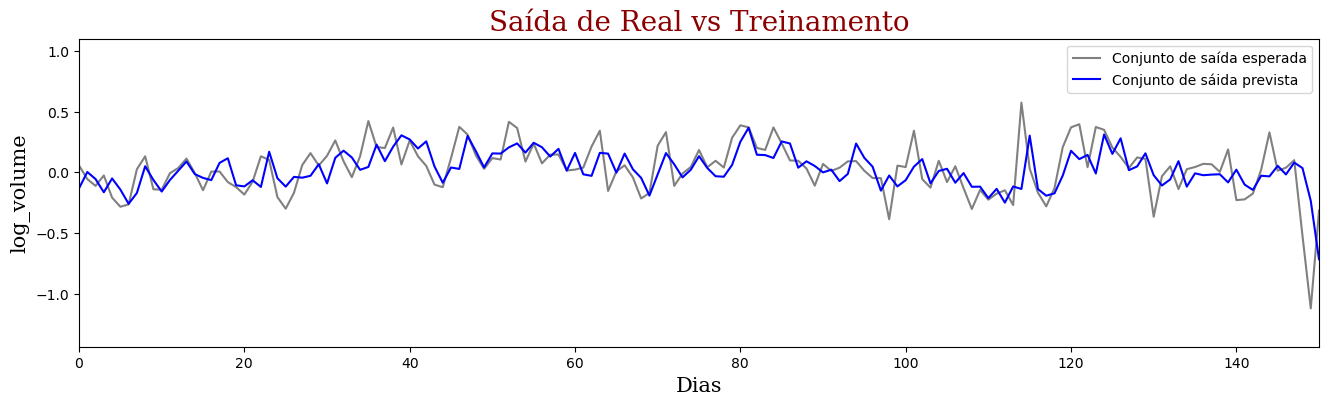

In [6]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

font1 = {'family':'serif','color':'black','size':15}
font2 = {'family':'serif','color':'darkred','size':20}

plt.figure(figsize=(16,4))

plt.title("Saída de Real vs Treinamento", fontdict = font2)
plt.ylabel("log_volume", fontdict = font1)
plt.xlabel("Dias", fontdict = font1)

plt.plot(y_test, color='gray')

plt.plot(y_pred, color='blue')

plt.xlim(0, 150)
                           
plt.legend(['Conjunto de saída esperada', 'Conjunto de sáida prevista'])
plt.show()

# Apresentando o gráfico de comparação de Score de Treinamento e de Teste

Podemos perceber que a melhor definição de lag(dias de atraso para entrada de dados) foi de 5 dias.

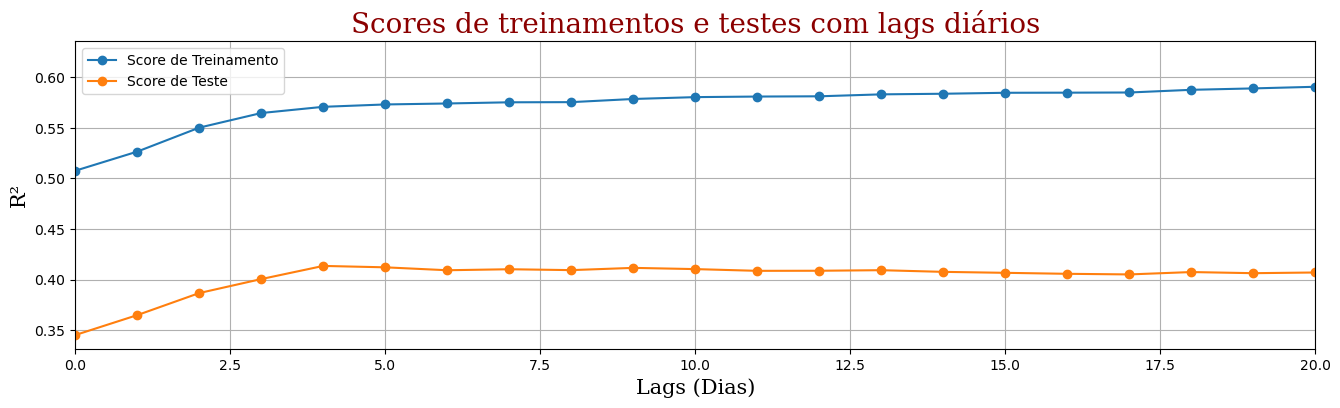

In [7]:
plt.figure(figsize=(16,4))

plt.title("Scores de treinamentos e testes com lags diários", fontdict = font2)
plt.ylabel("R²", fontdict = font1)
plt.xlabel("Lags (Dias)", fontdict = font1)

plt.plot(ScoreTrain,marker ='o')
plt.plot(ScoreTest, marker ='o')
plt.grid()
plt.xlim(0,20)

plt.legend(['Score de Treinamento', 'Score de Teste'])
plt.show()

# Apresentando o gráfico de comparação Semanal de Score de Treinamento e de Teste

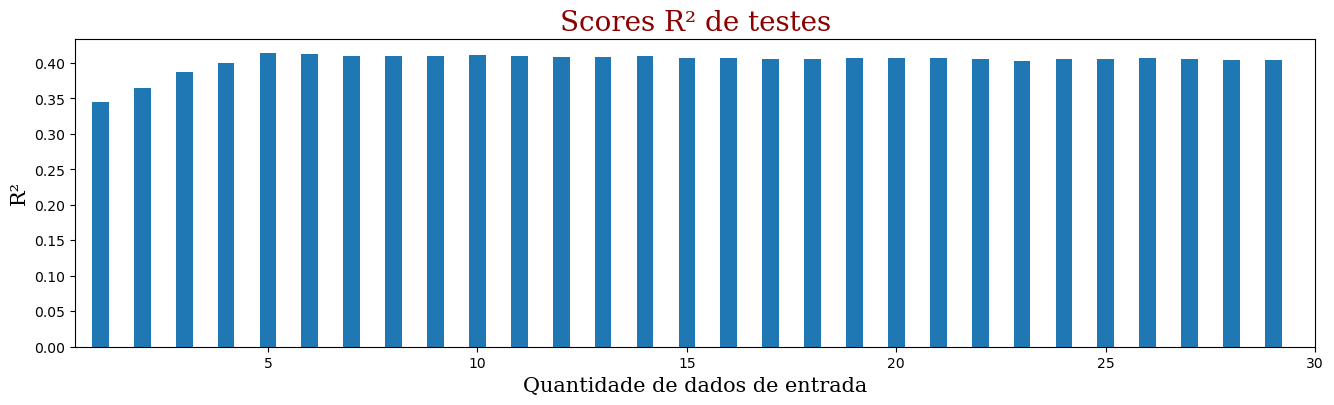

In [8]:
plt.figure(figsize=(16,4))

plt.title("Scores R² de testes", fontdict = font2)
plt.ylabel("R²", fontdict = font1)
plt.xlabel("Quantidade de dados de entrada", fontdict = font1)

x = []
y = []
z = 0

for i in ScoreTest:
    z+=1    
    if z < 30:
        x.append(z)
        y.append(i)

plt.bar(x, y, width=0.4)
plt.xlim(0.4,30)

plt.show()